In [ ]:
pip install mglearn

In [2]:
from sklearn.neural_network import MLPClassifier

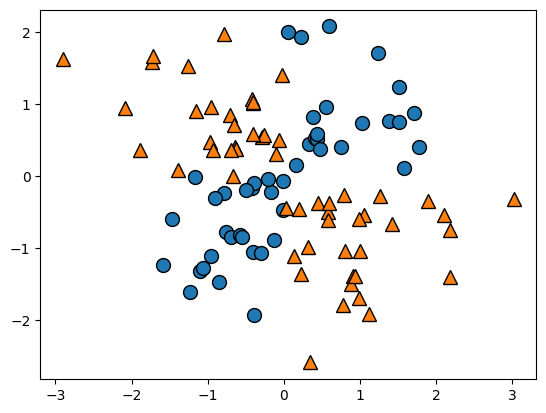

In [3]:
import numpy as np
from matplotlib import pyplot as plt
import mglearn

#200개의 데이터, feature = 2개
np.random.seed(30)
X = np.random.randn(100, 2)
y = np.logical_xor(X[:, 0]>0, X[:, 1]>0)
y = np.where(y, 1, -1)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.show()

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                   test_size=0.2,
                                                   shuffle=True)

직접 해보세요.  
1번째 은닉층 : 노드 10개  
2번째 은닉층 : 노드 5개  
3번째 은닉층 : 노드 3개

In [5]:
model_pctr = MLPClassifier(hidden_layer_sizes=( [ 10, 5, 3 ] ), max_iter=int(1e+05)) # 다층 퍼셉트론

In [6]:
model_pctr.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=[10, 5, 3], max_iter=100000)

In [7]:
model_pctr.score(X_train, y_train)

1.0

In [8]:
model_pctr.score(X_test, y_test)

0.9

#### parameter
- activation  
1) default : relu  
2) logistic (sigmoid)  
3) tanh (sigmoid 일종)  
4) indentity : linear  

- solver  
1) default : adam  
2) lbfgs  
3) sgd : stochastic(확률적) gradient decent  

- alpha : l2 norm 규제 정도 (Ridge regression과 동일)

- tol : cost 가 학습을 멈추는 기준 값 (cost = tol 일 될때까지)

- max_iter : optimizing 최대 반복 수

In [9]:
model_pctr.coefs_, model_pctr.intercepts_

([array([[-0.97719952,  0.91052862,  0.37315959, -1.24135551, -1.23729373,
          -0.98182279,  1.445856  , -0.19600184, -0.90645381, -1.16721497],
         [ 0.3458224 , -0.66092051,  1.53580252,  0.78046258,  0.26859691,
          -1.55079432,  1.03141809, -0.97662865,  1.21880344, -0.68337483]]),
  array([[ 2.56843061e-01, -4.62184653e-01, -8.15914772e-01,
          -1.32976915e-02, -9.30991171e-01],
         [-7.07978915e-01,  1.17932550e+00, -2.28454062e-01,
           8.12573403e-02, -9.85072598e-01],
         [ 4.05042263e-01, -1.13964181e+00,  4.87249443e-01,
           2.06380946e-02,  1.09908540e+00],
         [ 7.84398303e-01, -4.65364496e-01, -1.18726460e+00,
           1.77940607e-03, -2.32619337e-01],
         [ 1.11224831e+00, -9.75891206e-01,  7.25556669e-01,
          -1.23028295e-15, -4.47943940e-01],
         [-1.22453969e+00,  2.92254966e-01,  1.17729805e+00,
          -3.72210691e-03, -9.36266655e-02],
         [-1.09437963e-01,  4.52939229e-01,  9.08886246e-01,

In [10]:
#각 층의 coef 개수
for i, coef in enumerate(model_pctr.coefs_):
    print('hidden_layer_{}_weight_no: {}'.format(i, coef.shape))

hidden_layer_0_weight_no: (2, 10)
hidden_layer_1_weight_no: (10, 5)
hidden_layer_2_weight_no: (5, 3)
hidden_layer_3_weight_no: (3, 1)


총 weight 의 개수는 ?  
coef_ 몇 개인가?  
intercept_ 몇 개인가?  

  각 층마다의 coef_ intercept 는 몇개씩인가?

출력해보세요.

In [16]:
model_pctr.intercepts_[0].shape

(10,)

In [17]:
## 여기에서 코드를 작성해보세요.
total_weight = 0

for coef in model_pctr.coefs_:
    print(coef.shape)
    total_weight += (coef.shape[0] * coef.shape[1])

print('coef 수', total_weight)

for bias in model_pctr.intercepts_:
    print(bias.shape)
    total_weight += bias.shape[0]

print('weight 수', total_weight)


(2, 10)
(10, 5)
(5, 3)
(3, 1)
coef 수 88
(10,)
(5,)
(3,)
(1,)
weight 수 107


In [18]:
#graph, dataset 확장 패키지
def result_visualization(model, X, y):
    mglearn.plots.plot_2d_separator(model, X,
                                    fill=True, alpha=.1)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y)

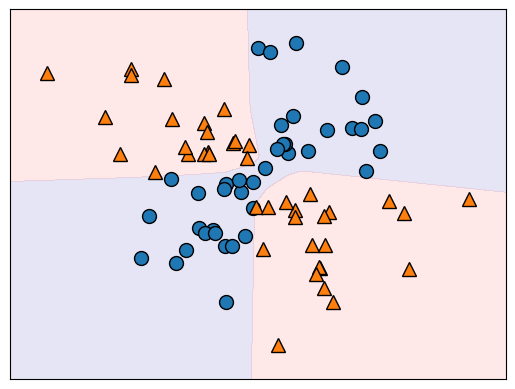

In [19]:
result_visualization(model_pctr, X_train, y_train)

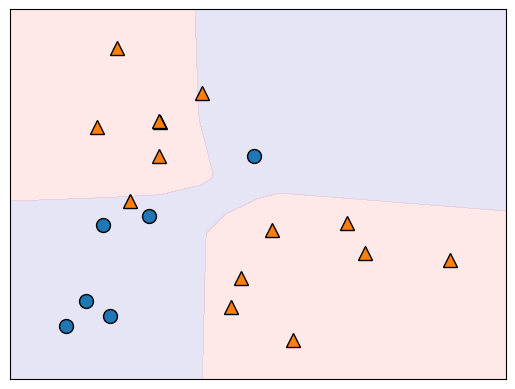

In [21]:
result_visualization(model_pctr, X_test, y_test)

사람 얼굴 인식 문제

In [22]:
from sklearn.datasets import fetch_olivetti_faces

In [23]:
face_data = fetch_olivetti_faces()
print(face_data.DESCR)

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to /root/scikit_learn_data
.. _olivetti_faces_dataset:

The Olivetti faces dataset
--------------------------

`This dataset contains a set of face images`_ taken between April 1992 and 
April 1994 at AT&T Laboratories Cambridge. The
:func:`sklearn.datasets.fetch_olivetti_faces` function is the data
fetching / caching function that downloads the data
archive from AT&T.

.. _This dataset contains a set of face images: https://cam-orl.co.uk/facedatabase.html

As described on the original website:

    There are ten different images of each of 40 distinct subjects. For some
    subjects, the images were taken at different times, varying the lighting,
    facial expressions (open / closed eyes, smiling / not smiling) and facial
    details (glasses / no glasses). All the images were taken against a dark
    homogeneous background with the subjects in an upright, frontal position 
    (with tolerance for some sid

In [24]:
64*64

4096

In [25]:
face_data.keys()

dict_keys(['data', 'images', 'target', 'DESCR'])

In [26]:
face_data.data.shape

(400, 4096)

In [30]:
face_data.data[0]

array([0.30991736, 0.3677686 , 0.41735536, ..., 0.15289256, 0.16115703,
       0.1570248 ], dtype=float32)

In [ ]:
plt.imshow(face_data.images[0])
plt.show()

In [31]:
face_data.images[0]

array([[0.30991736, 0.3677686 , 0.41735536, ..., 0.37190083, 0.3305785 ,
        0.30578512],
       [0.3429752 , 0.40495867, 0.43801653, ..., 0.37190083, 0.338843  ,
        0.3140496 ],
       [0.3429752 , 0.41735536, 0.45041323, ..., 0.38016528, 0.338843  ,
        0.29752067],
       ...,
       [0.21487603, 0.20661157, 0.2231405 , ..., 0.15289256, 0.16528925,
        0.17355372],
       [0.20247933, 0.2107438 , 0.2107438 , ..., 0.14876033, 0.16115703,
        0.16528925],
       [0.20247933, 0.20661157, 0.20247933, ..., 0.15289256, 0.16115703,
        0.1570248 ]], dtype=float32)

In [ ]:
face_data.target.shape

1) 데이터의 총 개수는?  
2) 하나의 데이터가 갖고 있는 X_feature의 개수는?  
3) 다중 클래스 문제인가?  
4) 클래스의 개수는?  

- 여기에 답변을 작성하세요

1. 400
2. 4096
3. O
4. 40

1) 적정한 층 수는?  
2) 각 층의 노드는 몇 개가 적당한가?  
3) 총 가중치의 개수는? (coef + weight)

In [34]:
from sklearn.neural_network import MLPClassifier

In [48]:
from sklearn.model_selection import train_test_split

In [49]:
X_train, X_test, y_train, y_test = train_test_split(face_data.data, face_data.target)

In [47]:
# 모델 선택
model = MLPClassifier(hidden_layer_sizes=([60, 50, 40]))

In [50]:
model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=[60, 50, 40])

In [51]:
model.score(X_train, y_train)

1.0

In [52]:
model.score(X_test, y_test)

0.86